In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DiseaseAndSymptoms.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

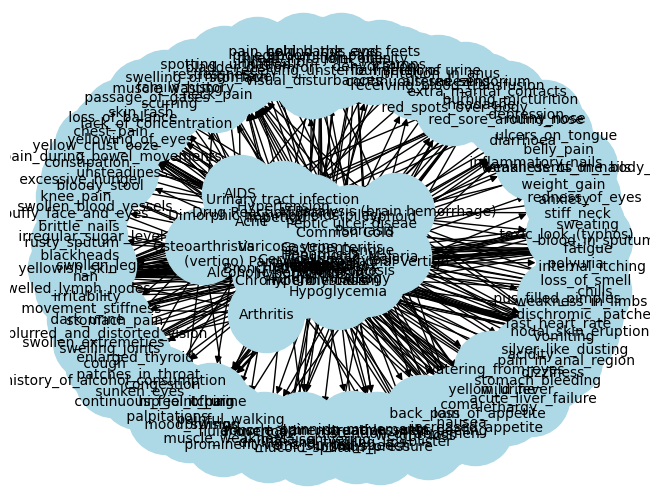

In [ ]:
graph = nx.DiGraph()

# Добавляем узлы и связи
for _, e in df.iterrows():
    graph.add_node(e['Disease'], label="Disease")
    graph.add_node(e["Symptom_1"], label="Symptom")
    graph.add_node(e["Symptom_2"], label="Symptom")
    graph.add_node(e["Symptom_3"], label="Symptom")
    graph.add_node(e["Symptom_4"], label="Symptom")
    graph.add_node(e["Symptom_5"], label="Symptom")
    graph.add_node(e["Symptom_6"], label="Symptom")
    graph.add_node(e["Symptom_7"], label="Symptom")
    graph.add_node(e["Symptom_8"], label="Symptom")
    graph.add_node(e["Symptom_9"], label="Symptom")
    graph.add_node(e["Symptom_10"], label="Symptom")
    graph.add_node(e["Symptom_11"], label="Symptom")
    graph.add_node(e["Symptom_12"], label="Symptom")
    graph.add_node(e["Symptom_13"], label="Symptom")
    graph.add_node(e["Symptom_14"], label="Symptom")
    graph.add_node(e["Symptom_15"], label="Symptom")

    graph.add_edge(e["Disease"], e["Symptom_1"])
    graph.add_edge(e["Disease"], e["Symptom_2"])
    graph.add_edge(e["Disease"], e["Symptom_3"])
    graph.add_edge(e["Disease"], e["Symptom_4"])
    graph.add_edge(e["Disease"], e["Symptom_5"])
    graph.add_edge(e["Disease"], e["Symptom_6"])
    graph.add_edge(e["Disease"], e["Symptom_7"])
    graph.add_edge(e["Disease"], e["Symptom_8"])
    graph.add_edge(e["Disease"], e["Symptom_9"])
    graph.add_edge(e["Disease"], e["Symptom_10"])
    graph.add_edge(e["Disease"], e["Symptom_11"])
    graph.add_edge(e["Disease"], e["Symptom_12"])
    graph.add_edge(e["Disease"], e["Symptom_13"])
    graph.add_edge(e["Disease"], e["Symptom_14"])
    graph.add_edge(e["Disease"], e["Symptom_15"])

# Рисуем граф
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10)
plt.show()

In [ ]:
nx.write_gexf(graph,'/content/drive/MyDrive/KnowledgeGraph.gexf')

In [ ]:
file_path = '/content/drive/MyDrive/BioGPT.gexf'  # Укажите путь к вашему файлу GEXF
graph = nx.read_gexf(file_path)
coord = nx.spring_layout(graph, k = 0.15)
G = graph.to_undirected()

In [ ]:
k = dict (G.degree ())
k2 = {key: value for key, value in k.items() if value > 0}
G2 = G.subgraph(list(k2.keys()))


In [ ]:
nx.connected_components(G)

In [ ]:
# take only giant connected component for the further analysis:
Components = (G.subgraph(c) for c in nx.connected_components(G))
Gc = max(list(Components), key=len)

#coord = nx.spring_layout(Gc, k = 0.15)
print("Number of nodes -", len(Gc.nodes()))
print("Number of edges -", len(Gc.edges()))

{'Fungal infection': 0.029069767441860465,
 'itching': 0.03488372093023256,
 ' skin_rash': 0.040697674418604654,
 ' nodal_skin_eruptions': 0.005813953488372093,
 ' dischromic _patches': 0.005813953488372093,
 nan: 0.22674418604651161,
 'Allergy': 0.029069767441860465,
 ' continuous_sneezing': 0.011627906976744186,
 ' shivering': 0.005813953488372093,
 ' chills': 0.040697674418604654,
 ' watering_from_eyes': 0.005813953488372093,
 'GERD': 0.040697674418604654,
 ' stomach_pain': 0.011627906976744186,
 ' acidity': 0.011627906976744186,
 ' ulcers_on_tongue': 0.005813953488372093,
 ' vomiting': 0.09883720930232558,
 ' cough': 0.029069767441860465,
 ' chest_pain': 0.03488372093023256,
 'Chronic cholestasis': 0.046511627906976744,
 ' yellowish_skin': 0.046511627906976744,
 ' nausea': 0.05813953488372093,
 ' loss_of_appetite': 0.05813953488372093,
 ' abdominal_pain': 0.05232558139534883,
 ' yellowing_of_eyes': 0.040697674418604654,
 'Drug Reaction': 0.03488372093023256,
 ' burning_micturition'

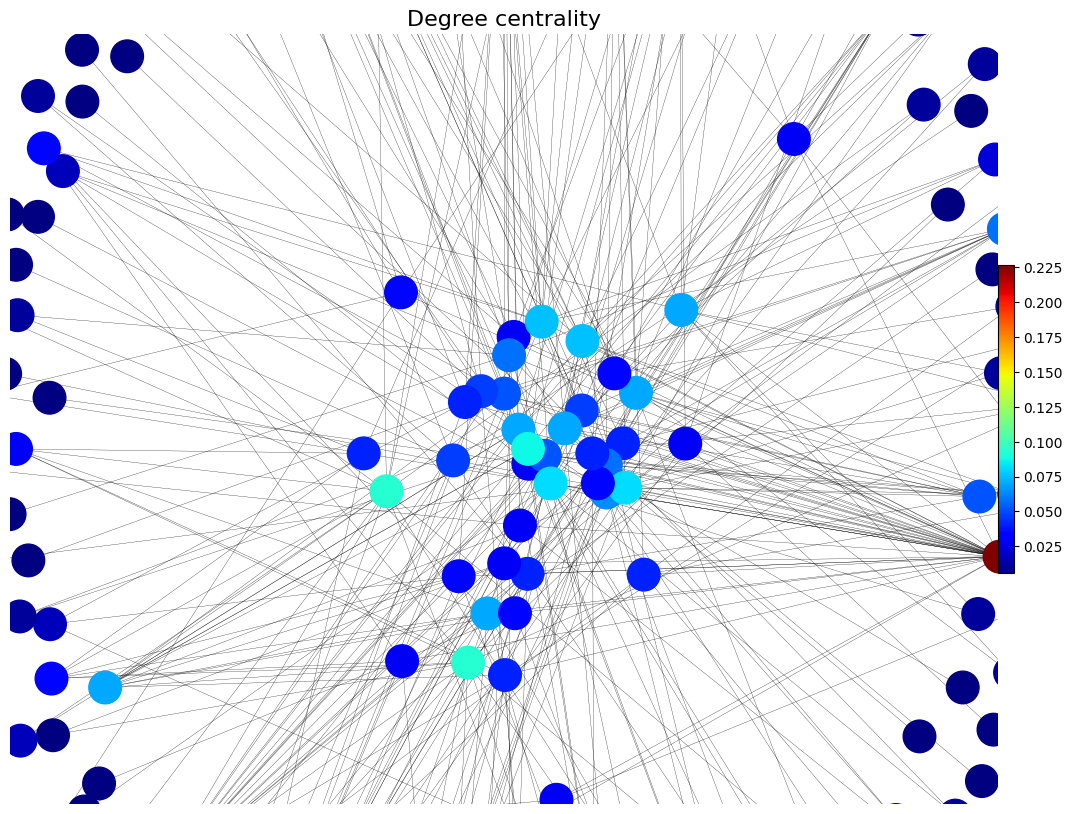

In [ ]:
plt.figure(figsize=(15,10))
degree_centr = nx.degree_centrality(Gc)
node_colors = list(degree_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord,
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(degree_centr.keys()),
                               cmap = 'jet')
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Degree centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(degree_centr, key = degree_centr.get)[-3:]
print(mean(degree_centr))

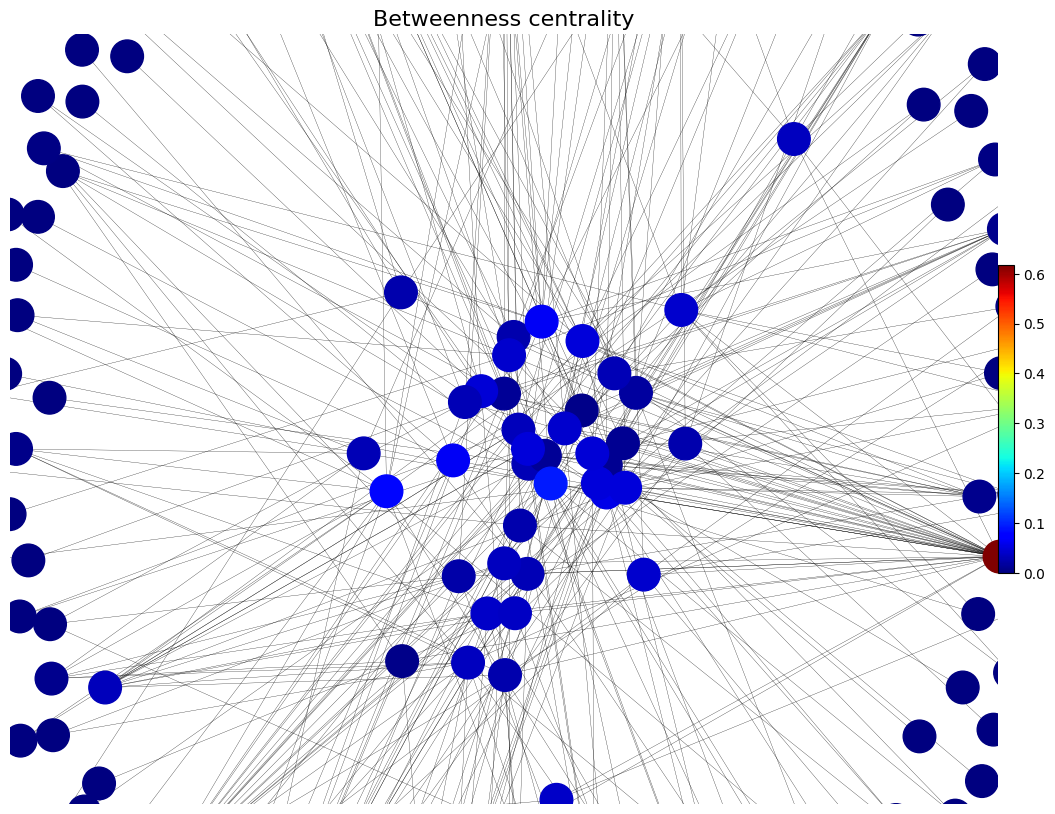

In [ ]:
plt.figure(figsize=(15,10))
between_centr = nx.betweenness_centrality(Gc)
node_colors = list(between_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord,
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(between_centr.keys()),
                               cmap = 'jet'
                               )
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Betweenness centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(between_centr, key = between_centr.get)[-5:]


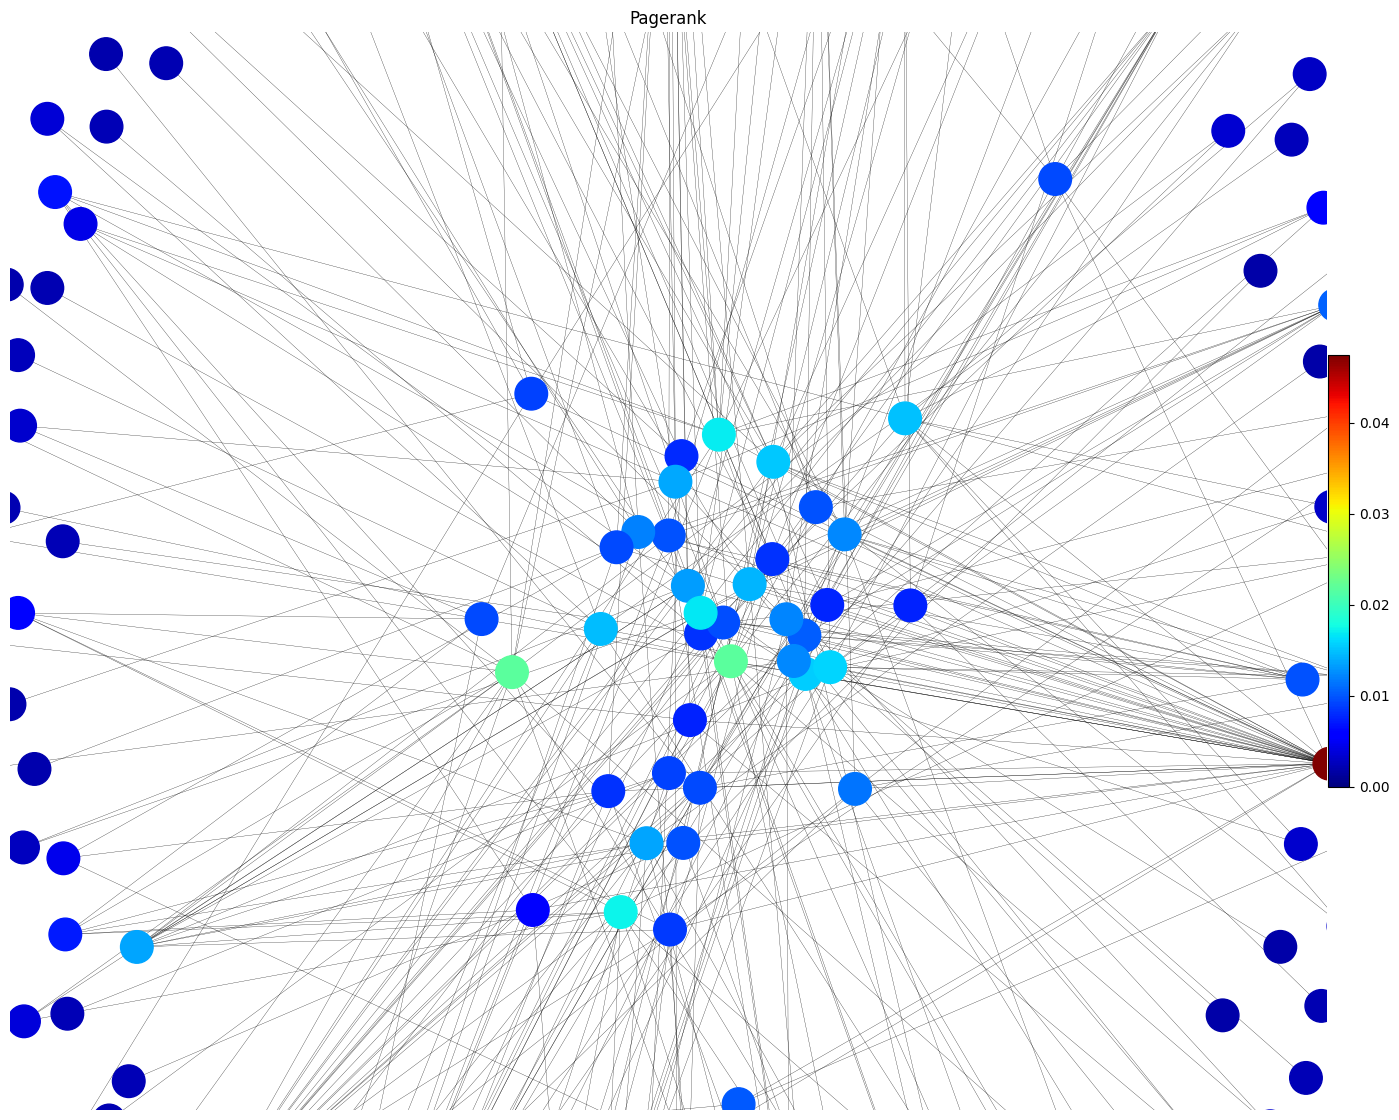

In [ ]:
plt.figure(figsize=(20,14))
page_rank = nx.pagerank(Gc)
node_colors = list(page_rank.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord,
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(page_rank.keys()),
                               cmap = 'jet',
                               vmin = 0.0)
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Pagerank')
plt.axis("off")

top_nodes = sorted(page_rank, key = page_rank.get)[-3:]



<ipython-input-24-03cb3c1ffae1>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap(colormap)


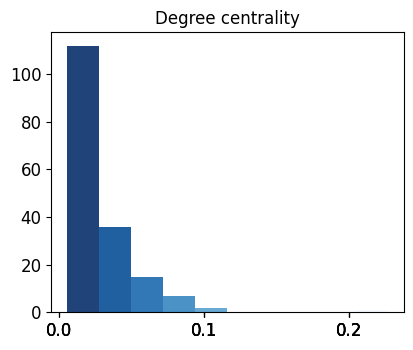

In [ ]:
def plot_hist(data, colormap, alpha, bins = 10, round_value = 1):
    cm = plt.cm.get_cmap(colormap)
    counts, bins, patches = plt.hist(data, alpha = alpha, color = 'Blue', bins = bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    plt.xticks(bins.round(round_value))
    col = bin_centers - min(bin_centers)
    col /= max(col)
    # use various colors for different bins:
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title("Degree centrality", y = 1.00)
plot_hist(data = list(degree_centr.values()), colormap = 'Blues_r', alpha = 0.9, bins = 10, round_value=1)

#Cores


In [ ]:
core_subgraph = nx.k_core(Gc, k=20)# G.subgraph(range(6,G.order()))
print(core_subgraph.number_of_nodes())
print(Gc.number_of_nodes())

0
173


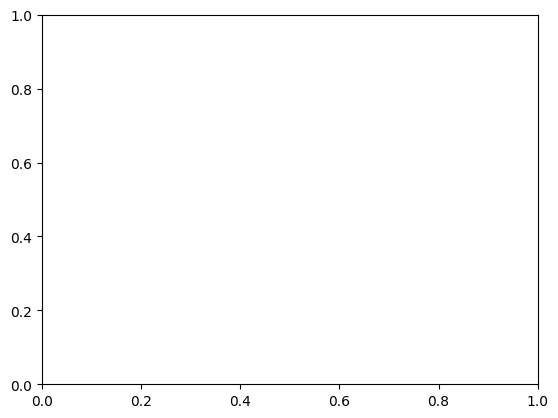

In [ ]:
coord = nx.spring_layout(core_subgraph, k = 0.15)
nx.draw_networkx(core_subgraph, pos=coord, with_labels = False, node_size = 200, node_color = 'b')

#ОСтрова


In [ ]:
import networkx as nx
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import plotly.graph_objs as go
import numpy as np
import time

In [ ]:
degree_centrality =  nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

In [6]:
len(G.edges()) / (len(G.nodes()) * (len(G.nodes()) - 1))
#Граф умеренно разреженный, плотность равна 0.012

#био гпт - 0.0016


NameError: name 'G' is not defined

In [5]:
#Создаём словарь со степенями вершин
degree_list = nx.degree(G)

NameError: name 'nx' is not defined

In [ ]:
# создаём функцию для отрисовки гистограммы
def plot_hist(data, r):
    hist, edges = np.histogram(data, bins=20, range=r, density=False)
    hist = hist / len(data)
    fig = go.Figure()
    fig.add_trace(go.Bar(x=edges[:-1], y=hist, marker_color='rgb(26, 118, 255)'))

    cumulative = np.cumsum(hist)

    fig.add_trace(go.Scatter(x=edges[:-1], y=cumulative, mode='lines', name='Кривая накопления'))

    fig.update_layout(
        xaxis_title='Степень',
        yaxis_title='Доля от общего числа с данной степенью',
        bargap=0.05,
        bargroupgap=0.2,
        xaxis=dict(
            tickmode='linear',
            dtick=(r[1]) / 20
        ),
        yaxis=dict(
            tickformat='.2%',
            range=[0, 1]
        ),
        width=1600,
        height=800
    )

    fig.show()

In [ ]:
#Топ вершин по важности степени связи с другими вершинами
top_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
for i in top_degree_centrality[:10]:
    print(i[0])

nan
 vomiting
 fatigue
Tuberculosis
Common Cold
Dengue
Hepatitis E
Hypothyroidism
Hepatitis B
Hypoglycemia


In [ ]:
#Считаем количество треугольников, содержащих данное ребро
import networkx as nx

def count_triangles(graph):
    triangles = {}
    for u, v in graph.edges():
        for w in graph.neighbors(v):
            if w != u and graph.has_edge(u, w):
                edge = tuple(sorted([u, w]))
                if edge not in triangles:
                    triangles[edge] = 0
                triangles[edge] += 1
    triangles_list = []
    for i in triangles:
        triangles_list.append([i[0],i[1], triangles[i]])
    return triangles_list

#комунити


In [ ]:
import urllib
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
from community import community_louvain
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities
import pandas as pd
from IPython.display import display, HTML, display_pretty
import os

In [ ]:
# Louvain's community detection method
def detect_communities_louvain(G):
    partition = community_louvain.best_partition(G)

    # Назначаем каждому узлу цвет на основе сообщества
    node_colors = [partition[node] for node in G.nodes()]
    communities = {}
    for node, community_id in partition.items():
        communities.setdefault(community_id, []).append(node)

    # Выводим сообщества
    print("Detected communities:")
    for community_id, nodes in communities.items():
        print(f"Community {community_id}: {nodes}")
    # Расположение узлов
    pos = nx.spring_layout(G)

    # Рисуем граф с разными цветами для каждого сообщества
    plt.figure(figsize=(8, 6))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Set3,
        edge_color="gray", font_size=10, node_size=800
    )
    plt.title("Graph Visualization with Louvain Communities")
    plt.show()

# Girvan Newman's community detection method 2
def greedy_modularity_communities(G):
    communities = community.greedy_modularity_communities(G)
    return sorted(sorted(c) for c in communities)

# Girvan Newman's community detection method
def detect_communities_girvan_newman(G):
    communities = community.girvan_newman(G)
    return sorted(sorted(c) for c in communities)

# Fast Greedy community detection method
def detect_communities_label_propagation(G):
    communities = label_propagation_communities(G)
    return sorted(map(sorted, communities))

In [ ]:
# Plot graph with communities, receives a list of communities, where each community is a list of nodes (ints)
def show_communities(G, communities, pos, name='title'):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    plt.figure()
    plt.title(name, fontsize=20)
    aux = 0
    for community in communities:
        nx.draw_networkx_nodes(G, pos, community, node_size = 50, node_color = colors[aux])
        aux = aux + 1
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show(block=True)

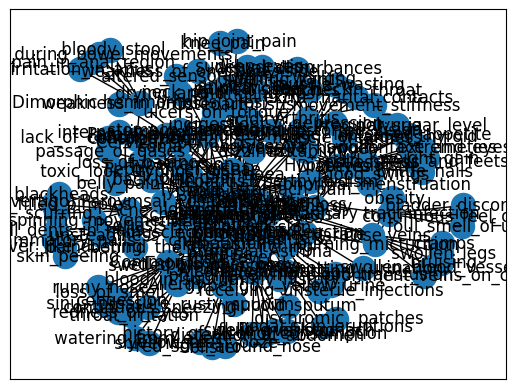

In [ ]:
nx.draw_networkx(G)

Detected communities:
Community 0: ['Fungal infection', 'itching', ' skin_rash', ' nodal_skin_eruptions', ' dischromic _patches', nan, ' stomach_pain', 'Drug Reaction', ' burning_micturition', ' spotting_ urination', 'Paralysis (brain hemorrhage)', ' weakness_of_one_body_side', ' altered_sensorium', 'Acne', ' pus_filled_pimples', ' blackheads', ' scurring', 'Urinary tract infection', ' bladder_discomfort', ' foul_smell_of urine', ' continuous_feel_of_urine', 'Impetigo', ' blister', ' red_sore_around_nose', ' yellow_crust_ooze']
Community 1: ['Allergy', ' continuous_sneezing', ' shivering', ' chills', ' watering_from_eyes', 'GERD', ' acidity', ' ulcers_on_tongue', ' cough', ' chest_pain', 'AIDS', ' muscle_wasting', ' patches_in_throat', ' high_fever', ' extra_marital_contacts', ' fatigue', 'Bronchial Asthma', ' breathlessness', ' mucoid_sputum', 'Chicken pox', ' mild_fever', ' swelled_lymph_nodes', ' malaise', 'Tuberculosis', ' phlegm', ' blood_in_sputum', 'Common Cold', ' throat_irrita

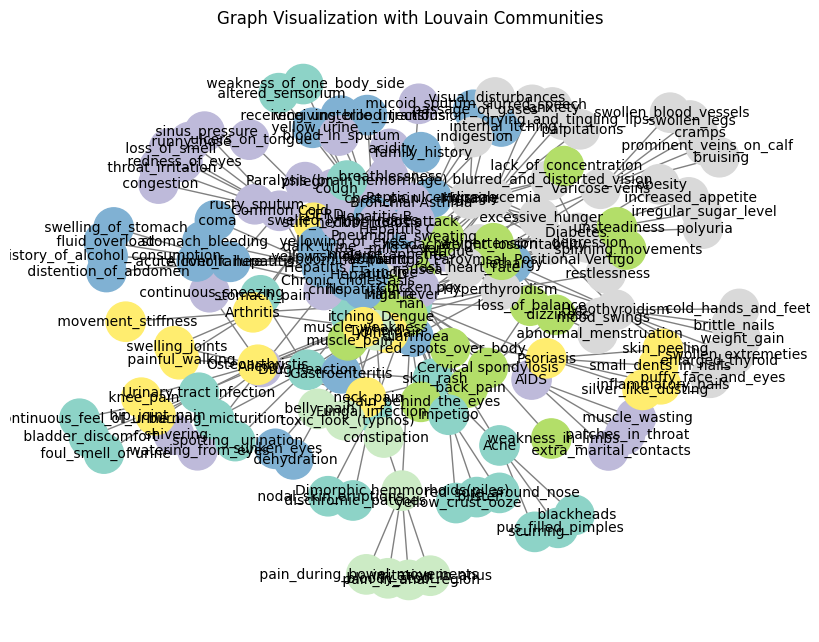

In [ ]:
methods = {
    'Louvain': detect_communities_louvain,
}
pos=nx.spring_layout(G)
for method in methods.items():
    result = method[1](G)


Number of nodes: 172
Number of edges: 320

Centrality Analysis:
                                Node  Degree  Closeness  Betweenness  \
36                           fatigue      17   0.369330     0.276730   
14                          vomiting      17   0.338614     0.159299   
104                     Tuberculosis      16   0.326960     0.067617   
107                      Common Cold      16   0.314917     0.102817   
81                            Dengue      14   0.366167     0.155557   
..                               ...     ...        ...          ...   
96                              coma       1   0.248908     0.000000   
92    receiving_unsterile_injections       1   0.232022     0.000000   
91       receiving_blood_transfusion       1   0.232022     0.000000   
90                      yellow_urine       1   0.232022     0.000000   
171                yellow_crust_ooze       1   0.208791     0.000000   

     Eigenvector  
36      0.282985  
14      0.265423  
104     0.2322

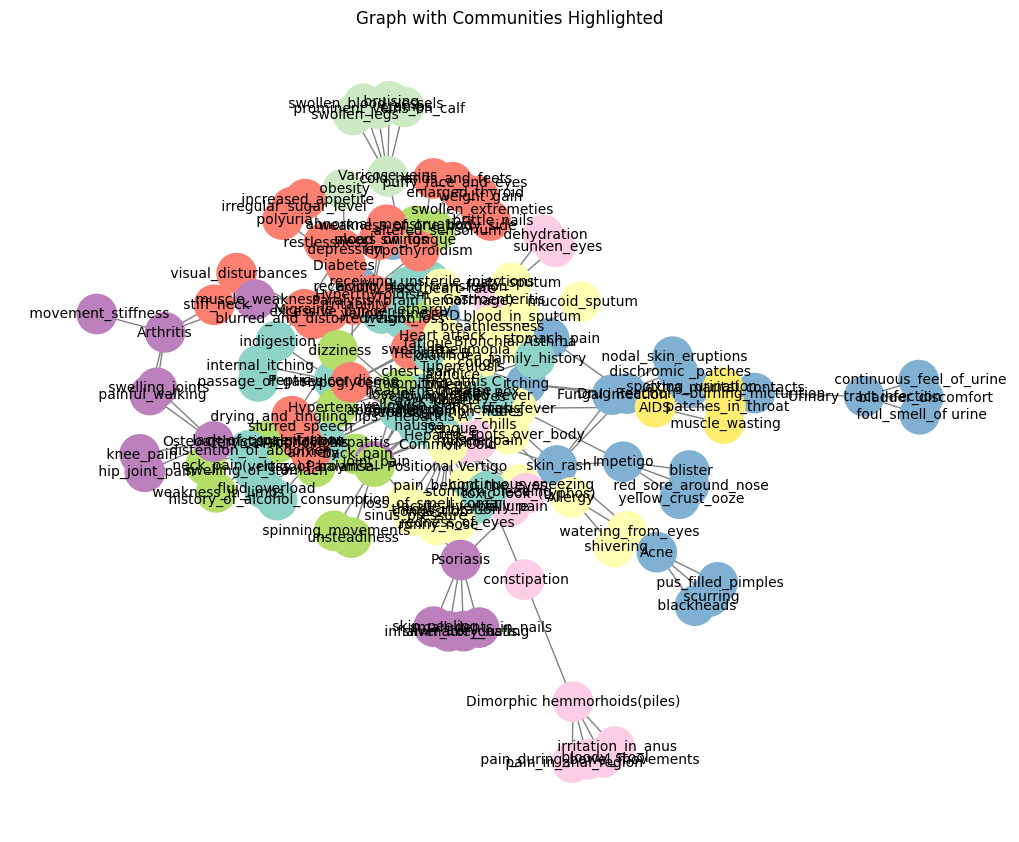

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
import pandas as pd


# 1. Очистка графа
# Удаляем узлы с некорректными значениями (NaN, None)
G.remove_nodes_from([node for node in G.nodes() if node is None or node != node])  # NaN check: node != node

# 2. Приведение всех узлов к строковому типу
G = nx.relabel_nodes(G, lambda x: str(x))

# Проверяем, что граф корректен
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# 3. Центральность узлов
degree_dict = dict(G.degree())
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Анализ центральности узлов
centrality_df = pd.DataFrame({
    "Node": list(G.nodes()),
    "Degree": [degree_dict[node] for node in G.nodes()],
    "Closeness": [closeness_centrality[node] for node in G.nodes()],
    "Betweenness": [betweenness_centrality[node] for node in G.nodes()],
    "Eigenvector": [eigenvector_centrality[node] for node in G.nodes()]
})
print("\nCentrality Analysis:")
print(centrality_df.sort_values(by="Degree", ascending=False))

# Коэффициент кластеризации
clustering_coefficients = nx.clustering(G)
print("\nClustering coefficients:")
print(clustering_coefficients)

# Размеры компонент связности
connected_components = list(nx.connected_components(G))
print("\nConnected Components:")
for i, component in enumerate(connected_components):
    print(f"Component {i + 1}: {component}")

# 4. Кластеризация графа (Greedy Modularity)
communities = list(greedy_modularity_communities(G))
print("\nCommunities (using Greedy Modularity):")
for i, community in enumerate(communities):
    print(f"Community {i + 1}: {list(community)}")

# 5. Визуализация графа с результатами анализа
# Кластеризация для цветовой кодировки
color_map = {}
for i, community in enumerate(communities):
    for node in community:
        color_map[node] = i

node_colors = [color_map[node] for node in G.nodes()]
pos = nx.spring_layout(G)

plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Set3,
    edge_color="gray", node_size=800, font_size=10
)
plt.title("Graph with Communities Highlighted")
plt.show()

# 6. Улучшение графа
# Удаление слабых связей (например, рёбра без веса или с низким весом)
edges_to_remove = [
    (u, v) for u, v, data in G.edges(data=True)
    if float(data.get("weight", 1)) < 1  # Приводим значение к числу
]
G.remove_edges_from(edges_to_remove)

# Добавление связей между узлами из одного кластера (если они не связаны)
for community in communities:
    for node1 in community:
        for node2 in community:
            if node1 != node2 and not G.has_edge(node1, node2):
                G.add_edge(node1, node2, weight=0.5)  # Вес для новых рёбер
